### yh concept uske liye h jb hm image upload krenge then hmara model detect krega ke face and mask then hm se ese website me convert kr denge

### Hamara ye model Only work kr rha h face ke upper jab hm ese puri body ke image dete h to yh confuse ho jata h so kuj techin ke throw ese solve krenge
# Step
### 1- hm phle Detect krenge face ko image (full Image ) me se
### 2- face wali image ko store krenge(variable me) or Crop.
### 3- then model ko apply krenge us extract image ke upr

# Step 1 hm phle Detect krenge face ko image (full Image ) me se

In [81]:
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
model = load_model('model.h5',compile=False)

AxesImage(size=(247, 204))


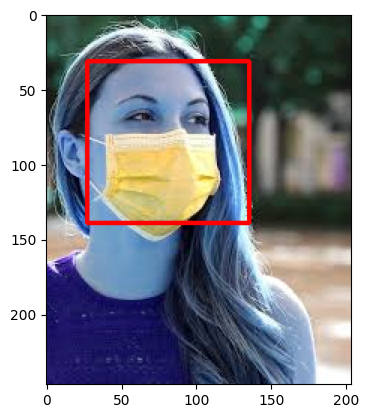

In [71]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img_path = 'images.jpeg'


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)


for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]


print(plt.imshow(img))

In [72]:
faces

array([[ 27,  31, 108, 108]], dtype=int32)

In [73]:
# y:y+h, x:x+w
y , h , x , w = faces[0][0],faces[0][2] ,  faces[0][1] , faces[0][3]
print(y,h,x,w)

27 108 31 108


#  2- face wali image ko store krenge(variable me) or Crop.


In [74]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = cv2.imread("images.jpeg")

AxesImage(size=(108, 108))


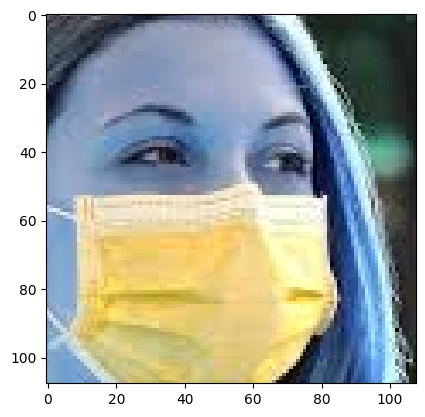

In [75]:
# Hm image ko numpy array se crop krte h basicalyy
# Image ka origin lEft me top side par hota (0,0) par
img_crop = img[y:y+h,x:x+w]
print(plt.imshow(img_crop))

# 3- then model ko apply krenge us extract image ke

In [76]:

IMAGE_SIZE = 224
img = cv2.resize(img_crop , (IMAGE_SIZE , IMAGE_SIZE)) # Because hmare model me esi size ke image ja rhi h to hme alwys use size me convert krna hota h

# Hm bta rhe h model ko ke hm only ek image bhej rhe h so that 

img = img.reshape((1,IMAGE_SIZE,IMAGE_SIZE,3))
out = model.predict(img)

out = out.argmax(axis=-1)

if out == 0:
    print("mask_weared_incorrect")
    
elif out == 1:
    print("with_mask")
    
else:
    print('without_mask')

1/1 [==============================] - 0s 101ms/step
with_mask


# All in one

AxesImage(size=(247, 204))
AxesImage(size=(108, 108))


2023-04-14 12:14:23.016183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 567ms/step
with_mask


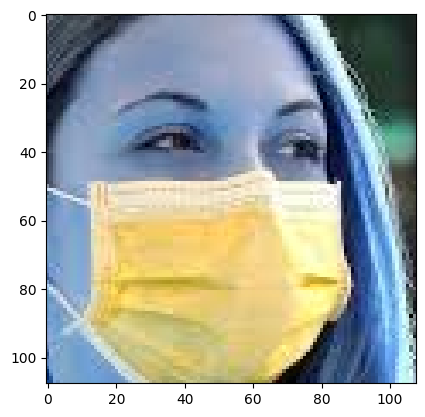

In [85]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img_path = 'uploads/images.jpeg'


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)


for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]


print(plt.imshow(img))

import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = cv2.imread(img_path)


# Hm image ko numpy array se crop krte h basicalyy
# Image ka origin lEft me top side par hota (0,0) par
img_crop = img[y:y+h,x:x+w]
print(plt.imshow(img_crop))


IMAGE_SIZE = 224
img = cv2.resize(img_crop , (IMAGE_SIZE , IMAGE_SIZE)) # Because hmare model me esi size ke image ja rhi h to hme alwys use size me convert krna hota h

# Image ko save krne ke liye jo crop hue h
cv2.imwrite("Crop Image.jpeg", img)


# Hm bta rhe h model ko ke hm only ek image bhej rhe h so that 

img = img.reshape((1,IMAGE_SIZE,IMAGE_SIZE,3))
out = model.predict(img)

out = out.argmax(axis=-1)

if out == 0:
    print("mask_weared_incorrect")
    
elif out == 1:
    print("with_mask")
    
else:
    print('without_mask')